<a href="https://colab.research.google.com/github/NoahGal-19/Group8/blob/main/ClimateChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving merged_climate_cocoa.csv to merged_climate_cocoa.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

merged_data = pd.read_csv("merged_climate_cocoa.csv")
print(merged_data.head())


   Year        Country  Temperature (°C)  Precipitation (mm)  Yield (kg/ha)
0  2000  Côte d'Ivoire             26.58           1153.7842          700.6
1  2001  Côte d'Ivoire             26.64           1107.7179          682.1
2  2002  Côte d'Ivoire             26.89           1255.6835          672.7
3  2003  Côte d'Ivoire             26.84           1344.1656          675.8
4  2004  Côte d'Ivoire             26.87           1217.4880          686.4


              Year  Temperature (°C)  Precipitation (mm)  Yield (kg/ha)
count   216.000000        216.000000          216.000000     216.000000
mean   2011.500000         24.928977         1824.974960     457.185648
std       6.938266          2.605996          827.205094     153.869104
min    2000.000000         19.220000          780.313350     161.300000
25%    2005.750000         24.377500         1139.214050     346.425000
50%    2011.500000         25.565000         1651.000800     442.400000
75%    2017.250000         27.045000         2234.007800     530.625000
max    2023.000000         28.300000         3773.515000     902.300000
Year                  0
Country               0
Temperature (°C)      0
Precipitation (mm)    0
Yield (kg/ha)         0
dtype: int64


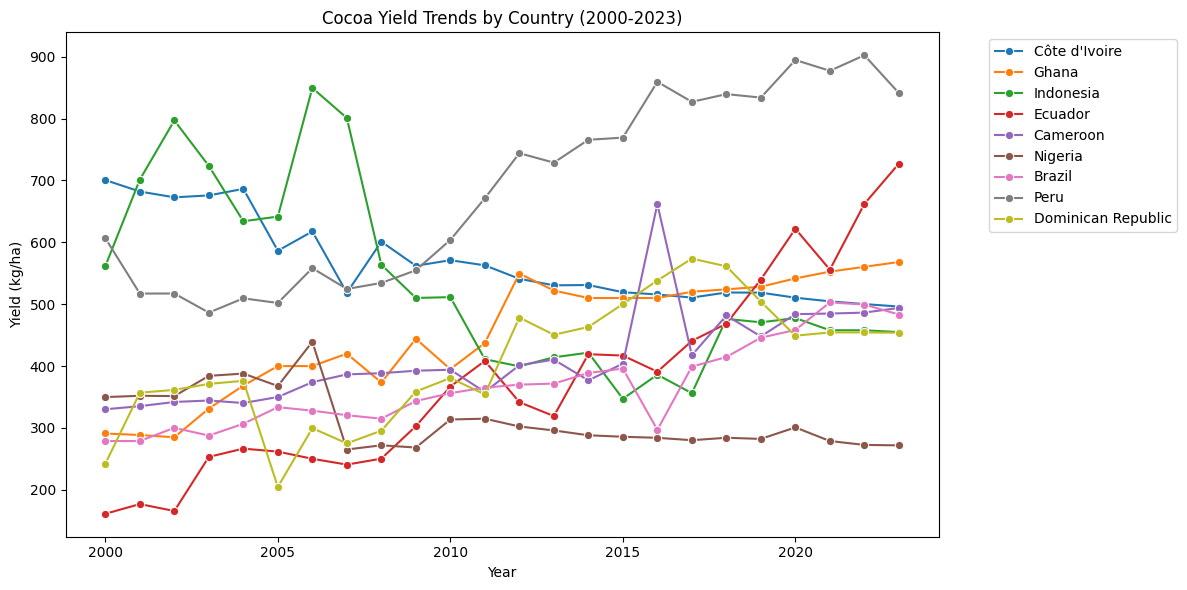

In [3]:
# Let's find some key information from this dataset
print(merged_data.describe())
print(merged_data.isnull().sum())

# Plot yield trends by country
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x="Year", y="Yield (kg/ha)", hue="Country", marker="o")
plt.title("Cocoa Yield Trends by Country (2000-2023)")
plt.ylabel("Yield (kg/ha)")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Correlation Matrix:
                    Yield (kg/ha)  Temperature (°C)  Precipitation (mm)
Yield (kg/ha)            1.000000         -0.267733            0.151634
Temperature (°C)        -0.267733          1.000000           -0.500371
Precipitation (mm)       0.151634         -0.500371            1.000000


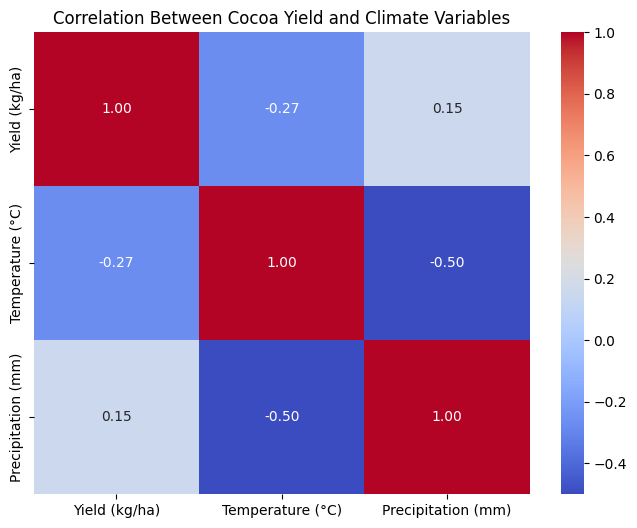

In [4]:
# Correlations
correlation_matrix = merged_data[["Yield (kg/ha)", "Temperature (°C)", "Precipitation (mm)"]].corr()
print("Correlation Matrix:")
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Cocoa Yield and Climate Variables")
plt.show()


In [5]:
# Regression Analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = merged_data[["Temperature (°C)", "Precipitation (mm)"]]
y = merged_data["Yield (kg/ha)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Coefficients: [-1.30697010e+01  1.46368638e-03]
Intercept: 783.2763613880662
Mean Squared Error: 27281.769947944787
R^2 Score: 0.11294820709527054


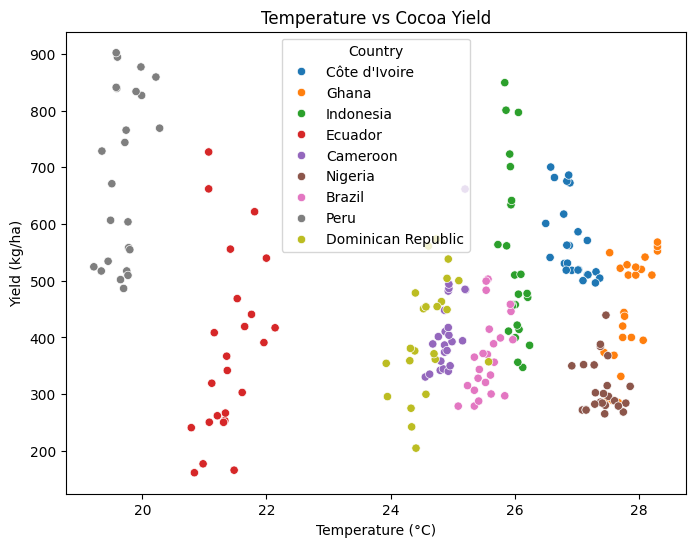

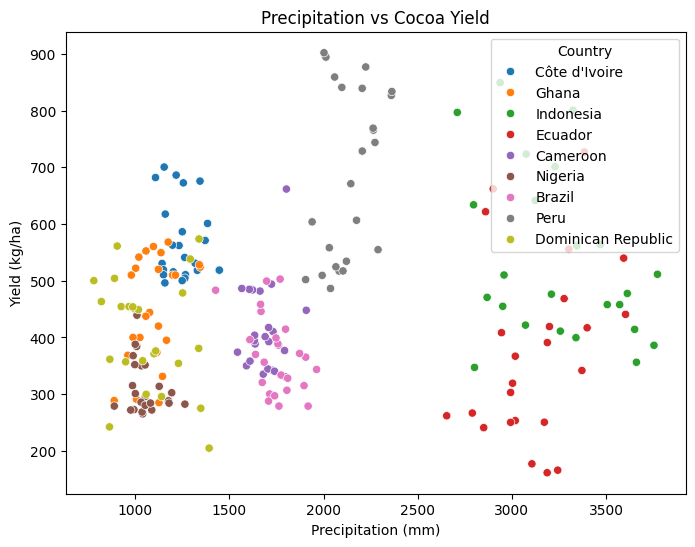

In [6]:
# Visual graphs of relationships
# Scatter plot: Temperature vs Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x="Temperature (°C)", y="Yield (kg/ha)", hue="Country", palette="tab10")
plt.title("Temperature vs Cocoa Yield")
plt.xlabel("Temperature (°C)")
plt.ylabel("Yield (kg/ha)")
plt.show()

# Scatter plot: Precipitation vs Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x="Precipitation (mm)", y="Yield (kg/ha)", hue="Country", palette="tab10")
plt.title("Precipitation vs Cocoa Yield")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Yield (kg/ha)")
plt.show()


In [14]:
import pandas as pd
import folium

merged_data = pd.read_csv("merged_climate_cocoa.csv")

# Add latitude and longitude for each country
country_coords = {
    "Côte d'Ivoire": [7.54, -5.55],
    "Ghana": [7.95, -1.02],
    "Brazil": [-14.24, -51.93],
    "Indonesia": [-0.79, 113.92],
    "Ecuador": [-1.83, -78.18],
    "Nigeria": [9.08, 8.67],
    "Cameroon": [5.69, 12.73],
    "Dominican Republic": [19.00, -70.67],
    "Peru": [-9.19, -75.01],
}

# Add latitude and longitude columns to the dataset
merged_data["Latitude"] = merged_data["Country"].map(lambda x: country_coords[x][0])
merged_data["Longitude"] = merged_data["Country"].map(lambda x: country_coords[x][1])

# Create a base map centered on a global view
m = folium.Map(location=[0, 0], zoom_start=2)

# Add points for each country with popups showing details
for _, row in merged_data.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=(
            f"<b>Country:</b> {row['Country']}<br>"
            f"<b>Year:</b> {row['Year']}<br>"
            f"<b>Yield:</b> {row['Yield (kg/ha)']} kg/ha<br>"
            f"<b>Temperature:</b> {row['Temperature (°C)']} °C<br>"
            f"<b>Precipitation:</b> {row['Precipitation (mm)']} mm"
        ),
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# Save the map to an HTML file
import os
print(os.getcwd())

m.save("cocoa_climate_map.html")
print("Map saved as 'cocoa_climate_map.html'")


/content
Map saved as 'cocoa_climate_map.html'
